In [1]:
from pathlib import Path
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.model_selection import KFold
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

from IPython.display import clear_output

import json

import warnings

from sklearn import preprocessing

In [2]:
# Entscheidungsbaum
TREE_PARAMS = {
    "random_state" : 0,
    "max_depth": 7,
}

In [3]:
path1 = Path(r"A:\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")
path2 = Path(r"C:\Users\rober\Documents\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")

if path1.is_dir():
    DATASET_DIR = path1
else:
    DATASET_DIR = path2

In [4]:
app_train = pd.read_csv(DATASET_DIR / "4. FillNA" / "application.csv")
bureau = pd.read_csv(DATASET_DIR / "4. FillNA" / "bureau.csv")
pa_pos = pd.read_csv(DATASET_DIR / "4. FillNA" / "pa_pos.csv")
pa_ip = pd.read_csv(DATASET_DIR / "4. FillNA" / "pa_ip.csv")
pa_cc = pd.read_csv(DATASET_DIR / "4. FillNA" / "pa_cc.csv")

In [5]:
app_train = app_train.set_index("SK_ID_CURR")
bureau = bureau.set_index("SK_ID_CURR")
pa_pos = pa_pos.set_index("SK_ID_CURR")
pa_ip = pa_ip.set_index("SK_ID_CURR")
pa_cc = pa_cc.set_index("SK_ID_CURR")

In [6]:
MODEL_APPLICATION = "2.1. Esembler_DecisionTree_Application.json"
MODEL_BUREAU = "2.2. Esembler_DecisionTree_bureau.json"
MODEL_PA_POS = "2.3. Esembler_DecisionTree_pa_pos.json"
MODEL_PA_IP = "2.4. Esembler_DecisionTree_pa_ip.json"
MODEL_PA_CC = "2.5. Esembler_DecisionTree_pa_cc.json"

In [7]:
with open(DATASET_DIR / "Models" / MODEL_APPLICATION, 'r') as file:
    model_application_data = json.load(file)
    
with open(DATASET_DIR / "Models" / MODEL_BUREAU, 'r') as file:
    model_bureau_data = json.load(file)
    
with open(DATASET_DIR / "Models" / MODEL_PA_POS, 'r') as file:
    model_pa_pos_data = json.load(file)
    
with open(DATASET_DIR / "Models" / MODEL_PA_IP, 'r') as file:
    model_pa_ip_data = json.load(file)
    
with open(DATASET_DIR / "Models" / MODEL_PA_CC, 'r') as file:
    model_pa_cc_data = json.load(file)

In [8]:
print(len(model_application_data["keep"]))
print(len(model_bureau_data["keep"]))
print(len(model_pa_pos_data["keep"]))
print(len(model_pa_ip_data["keep"]))
print(len(model_pa_cc_data["keep"]))

12
6
12
16
14


In [9]:
model_application_data["params"]

{'max_depth': 17, 'min_samples_leaf': 10, 'random_state': 0}

In [10]:
model_application = DecisionTreeClassifier(**model_application_data["params"])
model_bureau = DecisionTreeClassifier(**model_bureau_data["params"])
model_pa_pos = DecisionTreeClassifier(**model_pa_pos_data["params"])
model_pa_ip = DecisionTreeClassifier(**model_pa_ip_data["params"])
model_pa_cc = DecisionTreeClassifier(**model_pa_cc_data["params"])

In [11]:
df = app_train[["TARGET"]]
df.head()

,TARGET
SK_ID_CURR,
100002,1.0
100003,0.0
100004,0.0
100006,0.0
100007,0.0


In [12]:
# application prediction

In [13]:
x = app_train[model_application_data["keep"]]
x.head()

,A_EXT_SOURCE_3,A_AMT_REQ_CREDIT_BUREAU_DAY,A_DAYS_BIRTH,A_EXT_SOURCE_1,A_EXT_SOURCE_2,A_AMT_REQ_CREDIT_BUREAU_QRT,A_AMT_REQ_CREDIT_BUREAU_WEEK,A_BASEMENTAREA_AVG,A_LANDAREA_AVG,A_AMT_ANNUITY,A_AMT_INCOME_TOTAL,A_ORGANIZATION_TYPE
SK_ID_CURR,,,,,,,,,,,,
100002,0.139376,0.000000,-9461.0,0.083037,0.262949,0.000000,0.000000,0.036900,0.036900,24700.5,202500.0,0.0
100003,0.344844,0.000000,-16765.0,0.311267,0.622246,0.000000,0.000000,0.052900,0.013000,35698.5,270000.0,1.0
100004,0.729567,0.000000,-19046.0,0.550824,0.555912,0.000000,0.000000,0.075009,0.067504,6750.0,67500.0,2.0
100006,0.565898,0.005653,-19005.0,0.666039,0.650442,0.250421,0.044626,0.076735,0.068598,29686.5,135000.0,0.0
100007,0.571390,0.000000,-19932.0,0.559619,0.322738,0.000000,0.000000,0.071043,0.048938,21865.5,121500.0,3.0


In [14]:
y = app_train.loc[app_train.index]["TARGET"]
y.head()

SK_ID_CURR
100002    1.0
100003    0.0
100004    0.0
100006    0.0
100007    0.0
Name: TARGET, dtype: float64

In [15]:
model_application.fit(x,y)

DecisionTreeClassifier(max_depth=17, min_samples_leaf=10, random_state=0)

In [16]:
predicted = pd.DataFrame(model_application.predict_proba(x), index=app_train.index)
predicted.columns = ["A_PAYBACK", "A_DEFAULT"]

In [17]:
df = pd.merge(df, predicted, how="left", left_index=True, right_index=True)
df.head()

,TARGET,A_PAYBACK,A_DEFAULT
SK_ID_CURR,,,
100002,1.0,0.562500,0.437500
100003,0.0,0.960000,0.040000
100004,0.0,1.000000,0.000000
100006,0.0,1.000000,0.000000
100007,0.0,0.909502,0.090498


In [18]:
# bureau prediction

In [19]:
x = bureau[model_bureau_data["keep"]]
x.head()

,B_Closed,B_Active,B_AMT_CREDIT_SUM,B_DAYS_CREDIT_ENDDATE,B_AMT_CREDIT_SUM_DEBT,CNT_BURAEU
SK_ID_CURR,,,,,,
100002,6.0,2.0,638235.000000,309.000000,245781.000000,8.0
100003,3.0,1.0,810000.000000,1216.000000,0.000000,4.0
100004,2.0,0.0,792471.023437,1172.145688,353526.556281,2.0
100007,1.0,0.0,635755.340213,1163.754146,291016.898931,1.0
100008,2.0,1.0,267606.000000,471.000000,240057.000000,3.0


In [20]:
y = app_train.loc[bureau.index]["TARGET"]
y.head()

SK_ID_CURR
100002    1.0
100003    0.0
100004    0.0
100007    0.0
100008    0.0
Name: TARGET, dtype: float64

In [21]:
model_bureau.fit(x,y)

DecisionTreeClassifier(max_depth=11, min_samples_leaf=14, random_state=0)

In [22]:
predicted = pd.DataFrame(model_bureau.predict_proba(x), index=bureau.index)
predicted.columns = ["B_PAYBACK", "B_DEFAULT"]

In [23]:
df = pd.merge(df, predicted, how="left", left_index=True, right_index=True)
df.head()

,TARGET,A_PAYBACK,A_DEFAULT,B_PAYBACK,B_DEFAULT
SK_ID_CURR,,,,,
100002,1.0,0.562500,0.437500,0.939394,0.060606
100003,0.0,0.960000,0.040000,0.968482,0.031518
100004,0.0,1.000000,0.000000,0.946048,0.053952
100006,0.0,1.000000,0.000000,NaN,NaN
100007,0.0,0.909502,0.090498,0.926434,0.073566


In [24]:
# pa_pos prediction

In [25]:
x = pa_pos[model_pa_pos_data["keep"]]
x.head()

,PA_CNT_NAME_CONTRACT_STATUS_Refused,PA_AMT_ANNUITY,PA_POS_CNT_DPD,PA_AMT_DOWN_PAYMENT,PA_CNT_NAME_PRODUCT_TYPE_walk-in,PA_AMT_CREDIT,PA_CNT_NAME_YIELD_GROUP_high,PA_CNT_NAME_CLIENT_TYPE_New,PA_POS_CNT_PAYMENTS_LEFT,PA_CNT_NAME_YIELD_GROUP_low_normal,PA_CNT_NAME_CONTRACT_TYPE_Revolving loans,PA_CNT_CREDITS
SK_ID_CURR,,,,,,,,,,,,
158271,0.0,6404.310,0.0,0.000,0.0,65124.0,0.0,1.0,0.0,0.0,0.0,1.0
252457,0.0,4951.350,0.0,4.275,1.0,52641.0,0.0,0.0,9.0,0.0,1.0,1.0
260094,1.0,97839.945,0.0,8765.370,1.0,2294779.5,4.0,1.0,70.0,3.0,0.0,9.0
176456,0.0,14713.605,0.0,12349.575,0.0,120307.5,0.0,1.0,0.0,0.0,0.0,1.0
256657,7.0,60139.575,0.0,78714.000,5.0,1277523.0,0.0,1.0,28.0,2.0,2.0,3.0


In [26]:
y = app_train.loc[pa_pos.index]["TARGET"]
y.head()

SK_ID_CURR
158271    0.0
252457    0.0
260094    0.0
176456    0.0
256657    0.0
Name: TARGET, dtype: float64

In [27]:
model_pa_pos.fit(x,y)

DecisionTreeClassifier(max_depth=11, min_samples_leaf=12, random_state=0)

In [28]:
predicted = pd.DataFrame(model_pa_pos.predict_proba(x), index=pa_pos.index)
predicted.columns = ["PA_POS_PAYBACK", "PA_POS_DEFAULT"]

In [29]:
df = pd.merge(df, predicted, how="left", left_index=True, right_index=True)
df.head()

,TARGET,A_PAYBACK,A_DEFAULT,B_PAYBACK,B_DEFAULT,PA_POS_PAYBACK,PA_POS_DEFAULT
SK_ID_CURR,,,,,,,
100002,1.0,0.562500,0.437500,0.939394,0.060606,0.916859,0.083141
100003,0.0,0.960000,0.040000,0.968482,0.031518,0.961977,0.038023
100004,0.0,1.000000,0.000000,0.946048,0.053952,0.906885,0.093115
100006,0.0,1.000000,0.000000,NaN,NaN,0.913894,0.086106
100007,0.0,0.909502,0.090498,0.926434,0.073566,0.898026,0.101974


In [30]:
# pa_ip prediction

In [31]:
x = pa_ip[model_pa_ip_data["keep"]]
x.head()

,PA_CNT_NAME_PRODUCT_TYPE_walk-in,PA_IP_DAYS_DIFF_30,PA_CNT_NAME_CONTRACT_STATUS_Refused,PA_IP_DAYS_DIFF_180,PA_AMT_ANNUITY,PA_IP_DAYS_DIFF_60,PA_IP_AMT_DIFF_180,PA_IP_DAYS_DIFF_150,PA_CNT_NAME_YIELD_GROUP_low_normal,PA_RATE_DOWN_PAYMENT,PA_IP_PAYMENT_60,PA_IP_AMT_DIFF_120,PA_CNT_CODE_REJECT_REASON_HC,PA_AMT_DOWN_PAYMENT,PA_CNT_PRODUCT_COMBINATION_Card Street,PA_AMT_APPLICATION
SK_ID_CURR,,,,,,,,,,,,,,,,
252457,1.0,0.0,0.0,0.0,4951.350,-15.0,0.0,0.0,0.0,0.000088,9.128709e-01,0.0,0.0,4.275,1.0,47056.275
256657,5.0,-6.0,7.0,-1.5,49054.770,-13.0,0.0,-13.0,2.0,0.217818,2.041241e-01,0.0,5.0,15714.000,1.0,978570.000
198678,0.0,-20.0,0.0,-0.5,98806.050,-21.5,0.0,0.5,0.0,0.193358,4.540312e-08,0.0,0.0,13347.000,0.0,921721.500
394447,1.0,-0.5,0.0,0.0,17141.445,-7.0,0.0,-8.5,0.0,0.000000,6.115381e-01,0.0,0.0,0.000,1.0,129132.000
156331,0.0,0.0,0.0,-5.0,40866.795,0.0,0.0,-12.5,1.0,0.000000,1.416426e-02,0.0,0.0,0.000,1.0,793035.000


In [32]:
y = app_train.loc[pa_ip.index]["TARGET"]
y.head()

SK_ID_CURR
252457    0.0
256657    0.0
198678    0.0
394447    0.0
156331    0.0
Name: TARGET, dtype: float64

In [33]:
model_pa_ip.fit(x,y)

DecisionTreeClassifier(max_depth=11, min_samples_leaf=12, random_state=0)

In [34]:
predicted = pd.DataFrame(model_pa_ip.predict_proba(x), index=pa_ip.index)
predicted.columns = ["PA_IP_PAYBACK", "PA_IP_DEFAULT"]

In [35]:
df = pd.merge(df, predicted, how="left", left_index=True, right_index=True)
df.head()

,TARGET,A_PAYBACK,A_DEFAULT,B_PAYBACK,B_DEFAULT,PA_POS_PAYBACK,PA_POS_DEFAULT,PA_IP_PAYBACK,PA_IP_DEFAULT
SK_ID_CURR,,,,,,,,,
100002,1.0,0.562500,0.437500,0.939394,0.060606,0.916859,0.083141,0.932989,0.067011
100003,0.0,0.960000,0.040000,0.968482,0.031518,0.961977,0.038023,NaN,NaN
100004,0.0,1.000000,0.000000,0.946048,0.053952,0.906885,0.093115,NaN,NaN
100006,0.0,1.000000,0.000000,NaN,NaN,0.913894,0.086106,0.921053,0.078947
100007,0.0,0.909502,0.090498,0.926434,0.073566,0.898026,0.101974,0.888702,0.111298


In [36]:
# pa_cc prediction

In [37]:
x = pa_cc[model_pa_cc_data["keep"]]
x.head()

,PA_CC_BALANCE_60,PA_CNT_NAME_PRODUCT_TYPE_walk-in,PA_CC_BALANCE_90,PA_CNT_NAME_CONTRACT_STATUS_Refused,PA_CC_PAYMENT_180,PA_CNT_PRODUCT_COMBINATION_Cash X-Sell: low,PA_CC_BALANCE_150,PA_CC_DPD_30,PA_CC_DPD_90,PA_CC_PAYMENT_30,PA_CC_DPD_180,PA_CC_DPD_120,PA_CNT_CODE_REJECT_REASON_HC,PA_CNT_CREDITS
SK_ID_CURR,,,,,,,,,,,,,,
394447,1.434002,1.0,0.992963,0.0,1.318045,0.0,-0.415697,0.0,0.0,-1.389108,0.0,0.0,0.0,1.0
361282,0.828945,1.0,0.861611,0.0,-1.152838,0.0,-1.074370,0.0,0.0,0.850318,0.0,0.0,0.0,1.0
436351,0.000000,1.0,0.000000,3.0,0.000000,3.0,0.000000,0.0,0.0,0.000000,0.0,0.0,3.0,1.0
181153,0.000000,1.0,0.000000,3.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,1.0
309691,0.000000,1.0,0.000000,0.0,0.000000,1.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,1.0


In [38]:
y = app_train.loc[pa_cc.index]["TARGET"]
y.head()

SK_ID_CURR
394447    0.0
361282    0.0
436351    0.0
181153    0.0
309691    0.0
Name: TARGET, dtype: float64

In [39]:
model_pa_cc.fit(x,y)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=14, random_state=0)

In [40]:
predicted = pd.DataFrame(model_pa_cc.predict_proba(x), index=pa_cc.index)
predicted.columns = ["PA_CC_PAYBACK", "PA_CC_DEFAULT"]

In [41]:
df = pd.merge(df, predicted, how="left", left_index=True, right_index=True)
df.head()

,TARGET,A_PAYBACK,A_DEFAULT,B_PAYBACK,B_DEFAULT,PA_POS_PAYBACK,PA_POS_DEFAULT,PA_IP_PAYBACK,PA_IP_DEFAULT,PA_CC_PAYBACK,PA_CC_DEFAULT
SK_ID_CURR,,,,,,,,,,,
100002,1.0,0.562500,0.437500,0.939394,0.060606,0.916859,0.083141,0.932989,0.067011,NaN,NaN
100003,0.0,0.960000,0.040000,0.968482,0.031518,0.961977,0.038023,NaN,NaN,NaN,NaN
100004,0.0,1.000000,0.000000,0.946048,0.053952,0.906885,0.093115,NaN,NaN,NaN,NaN
100006,0.0,1.000000,0.000000,NaN,NaN,0.913894,0.086106,0.921053,0.078947,0.954878,0.045122
100007,0.0,0.909502,0.090498,0.926434,0.073566,0.898026,0.101974,0.888702,0.111298,NaN,NaN


In [42]:
df = df.fillna(0.5)
df.head()

,TARGET,A_PAYBACK,A_DEFAULT,B_PAYBACK,B_DEFAULT,PA_POS_PAYBACK,PA_POS_DEFAULT,PA_IP_PAYBACK,PA_IP_DEFAULT,PA_CC_PAYBACK,PA_CC_DEFAULT
SK_ID_CURR,,,,,,,,,,,
100002,1.0,0.562500,0.437500,0.939394,0.060606,0.916859,0.083141,0.932989,0.067011,0.500000,0.500000
100003,0.0,0.960000,0.040000,0.968482,0.031518,0.961977,0.038023,0.500000,0.500000,0.500000,0.500000
100004,0.0,1.000000,0.000000,0.946048,0.053952,0.906885,0.093115,0.500000,0.500000,0.500000,0.500000
100006,0.0,1.000000,0.000000,0.500000,0.500000,0.913894,0.086106,0.921053,0.078947,0.954878,0.045122
100007,0.0,0.909502,0.090498,0.926434,0.073566,0.898026,0.101974,0.888702,0.111298,0.500000,0.500000


In [43]:
# finales Modell

In [44]:
model = DecisionTreeClassifier(**TREE_PARAMS)

aucs = []

kfold = KFold(5, shuffle=True, random_state=1)
data = df

y = df["TARGET"]
x = df.drop(["TARGET"], axis=1)

for ID_TRAIN, ID_TEST in kfold.split(data):
    
    x_train = x.iloc[ID_TRAIN]
    y_train = y.iloc[ID_TRAIN]
    x_test = x.iloc[ID_TEST]
    y_test = y.iloc[ID_TEST]
    
    model.fit(x_train, y_train)
    auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
    aucs.append(auc)
    
    print('train: %s, test: %s, auc: %s' % (ID_TRAIN, ID_TEST, auc))

print("\n")
print("Durchschnitt: %.4f" % (np.mean(aucs)))
print("Standardabw.: %.2f" % (np.std(aucs)))
print("Varianz:      %.2f" % (np.var(aucs)))

train: [     0      2      3 ... 307508 307509 307510], test: [     1      4      6 ... 307493 307495 307501], auc: 0.9424355874692373
train: [     0      1      2 ... 307508 307509 307510], test: [     3     18     22 ... 307499 307503 307504], auc: 0.9383903053511271
train: [     0      1      2 ... 307508 307509 307510], test: [     9     10     15 ... 307489 307492 307502], auc: 0.9375281867992337
train: [     0      1      2 ... 307506 307507 307508], test: [    12     16     23 ... 307505 307509 307510], auc: 0.9408704382434503
train: [     1      3      4 ... 307505 307509 307510], test: [     0      2      5 ... 307506 307507 307508], auc: 0.9372002184115742


Durchschnitt: 0.9393
Standardabw.: 0.00
Varianz:      0.00


In [45]:
# TPR, TNR, P, R, F

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
from sklearn import metrics

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

In [50]:
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=0)

In [51]:
confusion_matrix(y_test, model.predict(x_test))

array([[140008,   1359],
       [  7474,   4915]], dtype=int64)

In [52]:
(tn,fp),(fn,tp)=confusion_matrix(y_test, model.predict(x_test))

In [53]:
# TPR
TPR = tp/(tp+fn)
# TNR
TNR = tn/(tn+fp)
# Precision
P = tp/(tp+fp)
# Recall
R = tp/(tp+fn)
# F-Score
F = 2*P*R/(P+R)

In [54]:
print(TPR)
print(TNR)
print(P)
print(R)
print(F)
print((tp+tn)/(tp+tn+fp+fn))

0.3967228993461942
0.9903867239171801
0.783391775581766
0.3967228993461942
0.526710603868617
0.9425518353755301


In [55]:
df = pd.DataFrame(
{"actual":y_test, "predicted": model.predict_proba(x_test)[:,1]}
)

In [56]:
df.head()

,actual,predicted
SK_ID_CURR,,
149741,1.0,0.446764
363290,0.0,0.000000
436006,0.0,0.247253
377703,0.0,0.000000
188624,0.0,0.163578


In [57]:
pred_defaults = df[df["predicted"] > 0.5]

In [58]:
pred_defaults = pred_defaults[pred_defaults["actual"] == 0]

<AxesSubplot:>

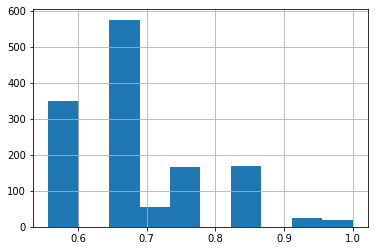

In [59]:
pred_defaults["predicted"].hist()